<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Régression Logistique

## Importations

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Données

Une expérience a été menée sur 5000 participants afin d'étudier les effets de l'âge et de la santé physique sur la perte auditive, et plus particulièrement sur la capacité à entendre les sons aigus. Ces données montrent le résultat de l'étude dans laquelle les participants ont été évalués et notés pour leur capacité physique, puis ont dû passer un test audio (réussite ou échec) qui évaluait leur capacité à entendre les hautes fréquences. L'âge de l'utilisateur a également été noté. Est-il possible de construire un modèle qui prédit la probabilité qu'une personne entende les sons à haute fréquence en se basant uniquement sur ses features / caractéristiques (âge et score physique) ?

* Features (caractéristiques)

    * age - Âge du participant en années
    * physical_score - Score obtenu lors de l'examen physique

* Label/Target (variable cible)

    * test_result - 0 si échec, 1 si test réussi

In [ ]:
df = pd.read_csv('hearing_test.csv')

In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Analyse Exploratoire de Données et Visualisation

N'hésitez pas à explorer davantage les données par vous-même.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [ ]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [ ]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

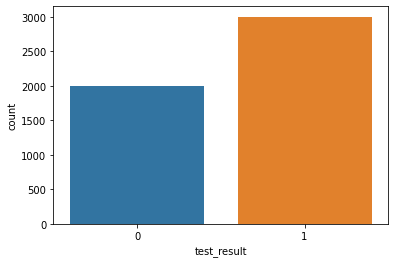

In [ ]:
sns.countplot(data=df,x='test_result');

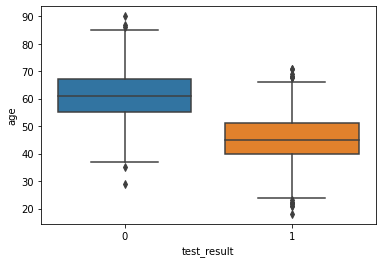

In [ ]:
sns.boxplot(x='test_result',y='age',data=df);

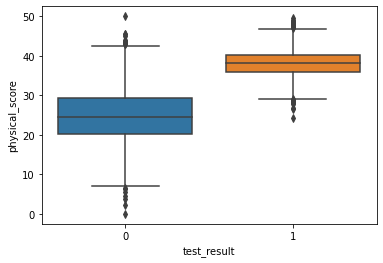

In [ ]:
sns.boxplot(x='test_result',y='physical_score',data=df);

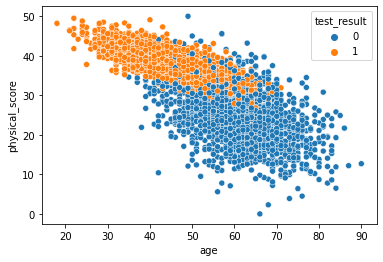

In [ ]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result');

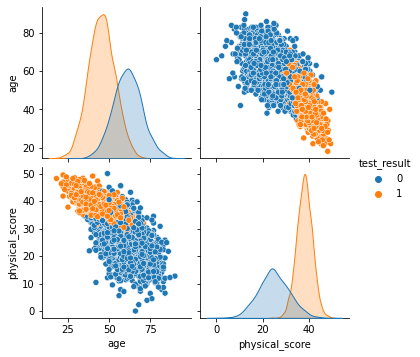

In [ ]:
sns.pairplot(df,hue='test_result');

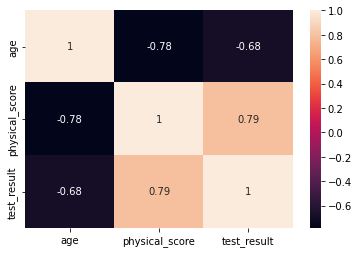

In [ ]:
sns.heatmap(df.corr(),annot=True);

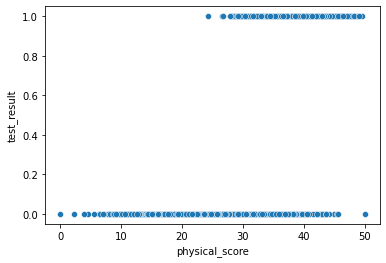

In [ ]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

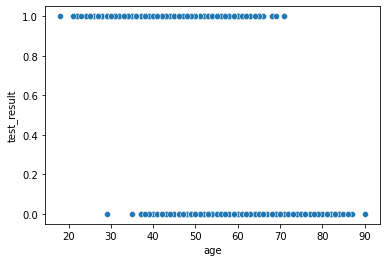

In [ ]:
sns.scatterplot(x='age',y='test_result',data=df);

Découvrez facilement de nouveaux types de graphiques en effectuant une recherche sur Google ! En recherchant "3d matplotlib scatter plot", vous arrivez rapidement sur : https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

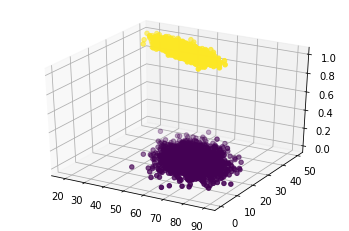

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result']);

### Train | Test Split et Scaling

In [ ]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Modèle de Régression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
# help(LogisticRegression)

In [ ]:
# help(LogisticRegressionCV)

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Interprétation des coefficients

Ce qu'il faut retenir :

* Ces coefficients se rapportent aux **cotes / odds** et ne peuvent pas être interprétés directement comme dans une régression linéaire.
* Nous avons fait l'entraînement sur une version **à l'échelle / scaled** des données. 
* Il est beaucoup plus facile de comprendre et d'interpréter la relation entre les coefficients que d'interpréter la relation entre les coefficients et la probabilité de la classe target/label (cible/étiquette).

Assurez-vous de regarder la vidéo d'explication et de consulter les liens ci-dessous :

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### Le rapport de cotes (odds ratio)

Pour une variable indépendante continue, l'Odds Ratio (OR) peut être défini comme suit :

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

Cette relation exponentielle permet d'interpréter $$\beta _{1}$$ 

Les chances / odds sont multipliées par $${e^\beta _{1}}$$ pour chaque augmentation d'une unité de x.

In [ ]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

Cela signifie :
* On peut s'attendre à ce que les **cotes / odds** de réussite au test **décroissent** (le coefficient d'origine était négatif) par unité d'augmentation de l'âge.
* On peut s'attendre à ce que les **cotes / odds** de réussite au test **augmentent** (le coefficient d'origine était positif) par unité d'augmentation du score physique.
* Sur la base des rapports/ratios entre eux, l'indicateur score_physique est un prédicteur plus fort que l'âge.

## Performance du modèle sur les tâches de classification

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.93

In [ ]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

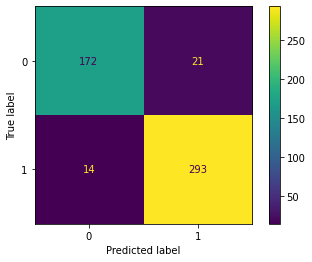

In [ ]:
# À partir du modèle lui-même
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test);

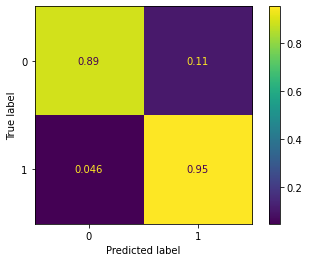

In [ ]:
# Scaled de sorte que la valeur la plus élevée = 1
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test,normalize='true');

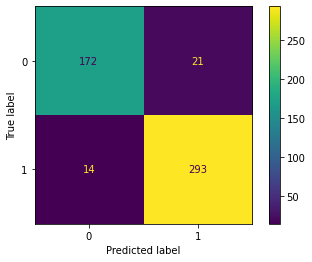

In [ ]:
# À partir des prédictions y_pred
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [ ]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [ ]:
y_train.iloc[0]

1

In [ ]:
# 0% de probabilité de la classe 0
# 100% de probabilité de la classe 1
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [ ]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1])

## Évaluation des courbes et AUC

**Assurez-vous de regarder la vidéo à ce sujet !**

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

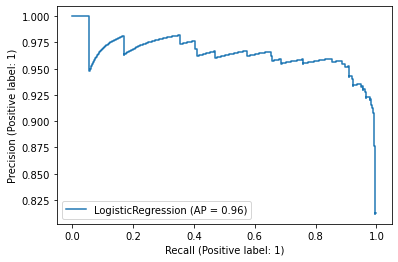

In [ ]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test);

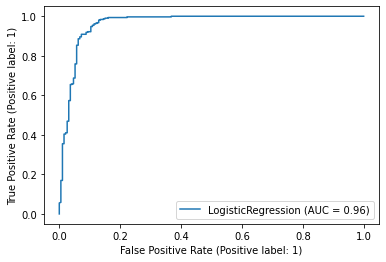

In [ ]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test);